# Лабораторная работа №2
## Тема: Детерминированные стратегии в игре "Дилемма заключённого"
### Цель: Исследовать и сравнить различные детерминированные стратегии



In [26]:
import numpy as np
import pandas as pd

W = np.array(
[
    [3, 0],  
    [5, 1]   
])

Стратегии 


In [27]:
def Alex(history_self, history_opp):
    return 1  

def Bob(history_self, history_opp):
    return 0  

def Clara(history_self, history_opp):
    if len(history_opp) == 0:
        return 0
    return history_opp[-1]  

def Denis(history_self, history_opp):
    if len(history_opp) == 0:
        return 0
    return 1 - history_opp[-1]  

def Emma(history_self, history_opp):
    if len(history_self) % 20 == 19:
        return 1  
    return 0

def Frida(history_self, history_opp):
    if 1 in history_opp:
        return 1  
    return 0


def George(history_self, history_opp):
    if len(history_self) == 0:
        return 0 
    
    total_score = 0
    for moveA, moveB in zip(history_self, history_opp):
        total_score += W[moveA][moveB]
    avg_score = total_score / len(history_self)
    
    if avg_score >= 3:
        return 0  
    else:
        return 1 

print("Стратегии определены.")


Стратегии определены.


Симуляция игр

In [28]:
def play_game(strategyA, strategyB, rounds=200):
    A_history, B_history = [], []
    A_scores, B_scores = [], []

    for _ in range(rounds):
        moveA = strategyA(A_history, B_history)
        moveB = strategyB(B_history, A_history)

        A_history.append(moveA)
        B_history.append(moveB)

        A_scores.append(W[moveA][moveB])
        B_scores.append(W[moveB][moveA])

    return A_scores, B_scores

print("Функция симуляции игры готова.")


Функция симуляции игры готова.


Метрики(общие очки и доминирующей серии)

In [29]:
def total_score(scores):
    return sum(scores)

def dominant_series(scoresA, scoresB):
    max_len = current_len = 0
    for a, b in zip(scoresA, scoresB):
        if a == 5 and b == 0:
            current_len += 1
            max_len = max(max_len, current_len)
        else:
            current_len = 0
    return max_len

print("Метрики готовы.")


Метрики готовы.


Таблица 


In [30]:
strategies = {
    "Alex": Alex,
    "Bob": Bob,
    "Clara": Clara,
    "Denis": Denis,
    "Emma": Emma,
    "Frida": Frida,
    "George": George
}


results = []

for nameA, stratA in strategies.items():
    for nameB, stratB in strategies.items():
        if nameA == nameB:
            continue
        A_scores, B_scores = play_game(stratA, stratB)
        results.append({
            "Игрок A": nameA,
            "Игрок B": nameB,
            "Очки A": total_score(A_scores),
            "Очки B": total_score(B_scores),
            "Домин. серия A": dominant_series(A_scores, B_scores),
            "Домин. серия B": dominant_series(B_scores, A_scores)
        })

df = pd.DataFrame(results)
print("Все игры")
df.head()


Все игры


,Игрок A,Игрок B,Очки A,Очки B,Домин. серия A,Домин. серия B
0,Alex,Bob,1000,0,200,0
1,Alex,Clara,204,199,1,0
2,Alex,Denis,1000,0,200,0
3,Alex,Emma,960,10,19,0
4,Alex,Frida,204,199,1,0


Полная таблица со всеми играми 

In [31]:
print("Результаты игр:")
display(df.head(41))


Результаты игр:


,Игрок A,Игрок B,Очки A,Очки B,Домин. серия A,Домин. серия B
0,Alex,Bob,1000,0,200,0
1,Alex,Clara,204,199,1,0
2,Alex,Denis,1000,0,200,0
3,Alex,Emma,960,10,19,0
4,Alex,Frida,204,199,1,0
5,Alex,George,204,199,1,0
6,Bob,Alex,0,1000,0,200
7,Bob,Clara,600,600,0,0
8,Bob,Denis,3,998,0,199
9,Bob,Emma,570,620,0,1


Среднее значение 


In [32]:
summary = df.groupby("Игрок A")[["Очки A", "Домин. серия A"]].mean().round(2)
summary = summary.sort_values(by="Очки A", ascending=False)

print("Средние результаты стратегий:")
display(summary)


Средние результаты стратегий:


,Очки A,Домин. серия A
Игрок A,,
Frida,651.50,36.00
Alex,595.33,70.33
George,532.33,0.83
Clara,506.17,0.33
Denis,454.83,36.67
Bob,395.50,0.00
Emma,318.67,0.67


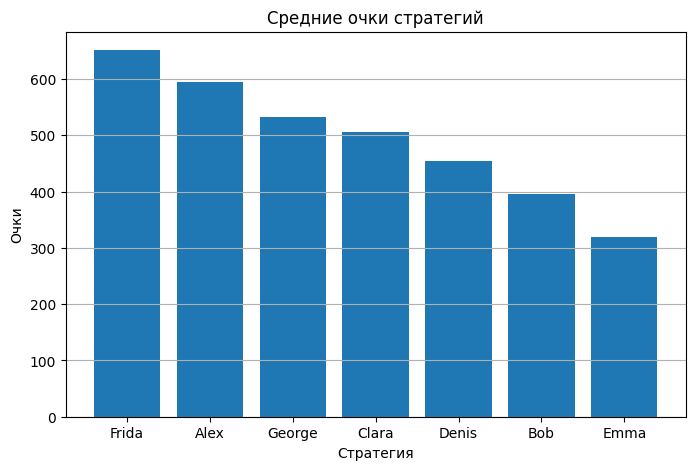

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(summary.index, summary["Очки A"])
plt.title("Средние очки стратегий")
plt.ylabel("Очки")
plt.xlabel("Стратегия")
plt.grid(True, axis='y')
plt.show()
